<a href="https://colab.research.google.com/github/Krithikasrini/Scaler_BusinessCaseStudies/blob/main/Unsupervised%20Learning(Scaler_CaseStudy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as s
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randInt
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

**Basic Analysation of Dataset**

In [ ]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv")

In [ ]:
df.shape

(205843, 7)

In [ ]:
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [ ]:
df['job_position'].value_counts()

Backend Engineer                                  71589
FullStack Engineer                                18397
Other                                             14069
Frontend Engineer                                  8442
Engineering Leadership                             6072
                                                  ...  
Messenger come driver                                 1
Senior Software Development Engineer (Backend)        1
Compliance auditor                                    1
Web Designer                                          1
Android Application developer                         1
Name: job_position, Length: 708, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153281 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [ ]:
df.describe()

,Unnamed: 0,orgyear,ctc,ctc_updated_year
count,205843.000000,205757.000000,2.058430e+05,205843.000000
mean,103273.941786,2014.882750,2.271685e+06,2019.628231
std,59741.306484,63.571115,1.180091e+07,1.325104
min,0.000000,0.000000,2.000000e+00,2015.000000
25%,51518.500000,2013.000000,5.300000e+05,2019.000000
50%,103151.000000,2016.000000,9.500000e+05,2020.000000
75%,154992.500000,2018.000000,1.700000e+06,2021.000000
max,206922.000000,20165.000000,1.000150e+09,2021.000000


In [ ]:
df['company_hash'].value_counts()

nvnv wgzohrnvzwj otqcxwto         8337
xzegojo                           5381
vbvkgz                            3481
zgn vuurxwvmrt vwwghzn            3411
wgszxkvzn                         3240
                                  ... 
onvqmhwpo                            1
bvsxw ogenfvqt uqxcvnt rxbxnta       1
agsbv ojontbo                        1
vnnhzt xzegwgb                       1
bvptbjnqxu td vbvkgz                 1
Name: company_hash, Length: 37299, dtype: int64

In [ ]:
df['email_hash'].value_counts()

bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
                                                                    ..
bb2fe5e655ada7f7b7ac4a614db0b9c560e796bdfcaa4e5367e69eedfea93876     1
d6cdef97e759dbf1b7522babccbbbd5f164a75d1b4139e02c945958720f1ed79     1
700d1190c17aaa3f2dd9070e47a4c042ecd9205333545dbfaee0f85644d00306     1
c2a1c9e4b9f4e1ed7d889ee4560102c1e2235b2c1a0e59cea95a6fe55c658407     1
0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f7e738a6a87d3712c31     1
Name: email_hash, Length: 153443, dtype: int64

In [ ]:
df['job_position'].value_counts()

Backend Engineer                  43554
FullStack Engineer                24717
Other                             18071
Frontend Engineer                 10417
Engineering Leadership             6870
                                  ...  
ayS                                   1
Principal Product Engineer            1
Senior Director of Engineering        1
Seller Support Associate              1
Android Application developer         1
Name: job_position, Length: 1017, dtype: int64

In [ ]:
df.isnull().sum()

Unnamed: 0              0
company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

<Axes: >

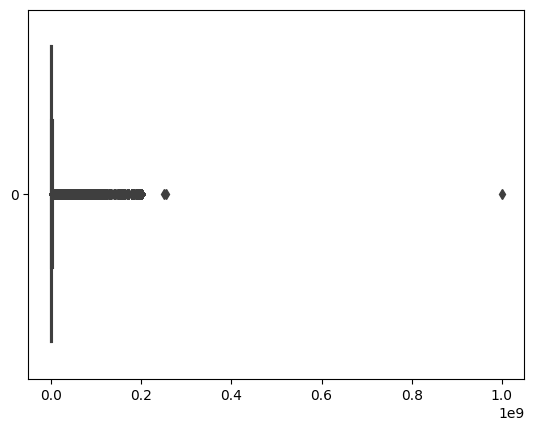

In [ ]:
sns.boxplot(data = df['ctc'],orient='h')

<Axes: >

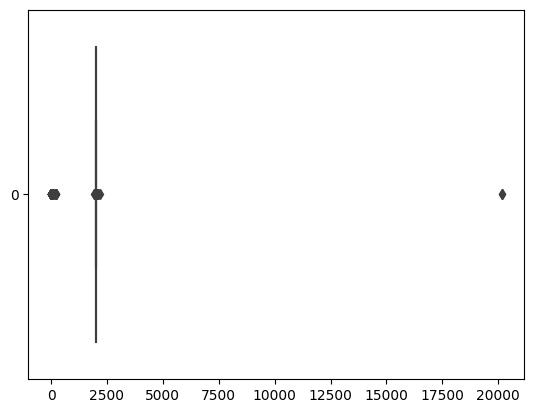

In [ ]:
sns.boxplot(data = df['orgyear'],orient='h')

In [ ]:
df = df.drop(['Unnamed: 0'],axis=1)

In [ ]:
df['company_hash'].value_counts()

nvnv wgzohrnvzwj otqcxwto         8337
xzegojo                           5381
vbvkgz                            3481
zgn vuurxwvmrt vwwghzn            3411
wgszxkvzn                         3240
                                  ... 
onvqmhwpo                            1
bvsxw ogenfvqt uqxcvnt rxbxnta       1
agsbv ojontbo                        1
vnnhzt xzegwgb                       1
bvptbjnqxu td vbvkgz                 1
Name: company_hash, Length: 37299, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   company_hash      205799 non-null  object
 1   email_hash        205843 non-null  object
 2   orgyear           205843 non-null  int64 
 3   ctc               205843 non-null  int64 
 4   job_position      153281 non-null  object
 5   ctc_updated_year  205843 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 9.4+ MB


**Checking unique emails and frequency of occurrence of the same email hash in the data. Recording observation and inference, wherever necessary**

In [ ]:
# Getting count of produt column values
count = df.email_hash.value_counts()

In [ ]:
print("Count:\n",count,"\n")

Count:
 bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
                                                                    ..
bb2fe5e655ada7f7b7ac4a614db0b9c560e796bdfcaa4e5367e69eedfea93876     1
d6cdef97e759dbf1b7522babccbbbd5f164a75d1b4139e02c945958720f1ed79     1
700d1190c17aaa3f2dd9070e47a4c042ecd9205333545dbfaee0f85644d00306     1
c2a1c9e4b9f4e1ed7d889ee4560102c1e2235b2c1a0e59cea95a6fe55c658407     1
0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f7e738a6a87d3712c31     1
Name: email_hash, Length: 153443, dtype: int64 



In [ ]:
res = count[count>1]
res

bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
                                                                    ..
2096344ff74a1a1367c3b54379bc7e66565c5d71bd03a42975922685c5b34aa5     2
131a99b5ea576371d582e544606d492e5fe1b83ae2767e0c91569718b9dcc214     2
b66dd75827b98c3c033bb048b033450e0280de9386b3584546981fdc5edf7c2c     2
758ed85112eb8a41f36a7c55532fc47db0b56610699f20d7668977a55273e4ba     2
dfd77f497c91bd01379414d696d1e1fb335869f52871497cc8678d7c3e281e0b     2
Name: email_hash, Length: 41216, dtype: int64

**Checking for missing values and Prepare data for KNN/ Mean Imputation**

In [ ]:
df['company_hash'].fillna(df['company_hash'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

company_hash            0
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

In [ ]:
df['job_position'].fillna(df['job_position'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

company_hash         0
email_hash           0
orgyear             86
ctc                  0
job_position         0
ctc_updated_year     0
dtype: int64

In [ ]:
df['orgyear'].fillna(df['orgyear'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

**Removing special characters from the dataset by using Regex**

In [ ]:
df['company_hash'] = df['company_hash'].str.replace('\W', '', regex=True)

In [ ]:
df['email_hash'] = df['email_hash'].str.replace('\W', '', regex=True)

In [ ]:
df.shape

(205843, 6)

**Checking for duplicates in the dataset and drop them**

In [ ]:
df.drop_duplicates(subset=['company_hash', 'email_hash'], keep='last',inplace=True)

In [ ]:
df.shape

(160277, 6)

**Making some new features like adding ‘Years of Experience’ column by subtracting orgyear from current year**

In [ ]:
df['orgyear'] = df['orgyear'].astype(int)
df['ctc_updated_year'] = df['ctc_updated_year'].astype(int)
df['ctc'] = df['ctc'].astype(int)

In [ ]:
year = datetime.now().year
year

NameError: ignored

In [ ]:
df['Years_of_Experience'] = 2023 - df['orgyear']

In [ ]:
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience
0,atrgxnntxzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,7
2,ojzwnvwnxwvx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,8
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,6
7,vwwtznhqtntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019,400000,Backend Engineer,2019,4
9,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,2019,360000,Backend Engineer,2019,4
...,...,...,...,...,...,...,...
205838,vuurtxzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008,220000,Backend Engineer,2019,15
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017,500000,Backend Engineer,2020,6
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021,700000,Backend Engineer,2021,2
205841,zgnvuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019,5100000,Backend Engineer,2019,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   company_hash         205843 non-null  object
 1   email_hash           205843 non-null  object
 2   orgyear              205843 non-null  int64 
 3   ctc                  205843 non-null  object
 4   job_position         205843 non-null  object
 5   ctc_updated_year     205843 non-null  int64 
 6   Years_of_Experience  205843 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 11.0+ MB


**Getting the 5 point summary of CTC (mean, median, max, min, count etc) on the basis of Company, Job Position, Years of Experience**

In [ ]:
df_mean = (df.groupby(['company_hash','job_position','Years_of_Experience'])["ctc"].mean()).reset_index(name='average')
df_mean

,company_hash,job_position,Years_of_Experience,average
0,0,Other,3,100000.0
1,0000,Other,6,300000.0
2,01ojztqsj,Android Engineer,7,270000.0
3,01ojztqsj,Frontend Engineer,12,830000.0
4,05mzexzytvrnyuqxcvntrxbxnta,Backend Engineer,4,1100000.0
...,...,...,...,...
92601,zz,Backend Engineer,14,500000.0
92602,zz,Other,10,1370000.0
92603,zzbztdnstzvacxogqjucnrna,Backend Engineer,6,600000.0
92604,zzgato,Backend Engineer,9,130000.0


In [ ]:
df_mean['average'] = df_mean['average'].astype(int)

In [ ]:
df_mean_company = (df.groupby(['company_hash'])["ctc"].mean()).reset_index(name='average')

In [ ]:
df_mean_company['average'] = df_mean_company['average'].astype(int)

In [ ]:
df_median = df.groupby(['company_hash','job_position','Years_of_Experience'])["ctc"].median().reset_index(name='average')

In [ ]:
df_max = df.groupby(['company_hash','job_position','Years_of_Experience'])["ctc"].max().reset_index(name='max')

In [ ]:
df_min = df.groupby(['company_hash','job_position','Years_of_Experience'])["ctc"].min().reset_index(name='min')

In [ ]:
df_count = df.groupby(['company_hash','job_position','Years_of_Experience'])["ctc"].count().reset_index(name='count')

In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience
0,atrgxnntxzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,7
2,ojzwnvwnxwvx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,8
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,6
7,vwwtznhqtntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019,400000,Backend Engineer,2019,4
9,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,2019,360000,Backend Engineer,2019,4


**Merging the same with original dataset carefully and creating some flags showing learners with CTC greater than the Average of their Company’s department having same Years of Experience - Call that flag designation with values [1,2,3]**

In [ ]:
df_merged = pd.merge(df,df_mean,left_on=['company_hash','job_position','Years_of_Experience'],right_on=['company_hash','job_position','Years_of_Experience'],how='left')

In [ ]:
df_merged.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,average
0,atrgxnntxzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,7,1100000
1,ojzwnvwnxwvx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,8,2000000
2,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,6,1380000
3,vwwtznhqtntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019,400000,Backend Engineer,2019,4,660000
4,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,2019,360000,Backend Engineer,2019,4,360000


In [ ]:
df_merged['rank'] = df_merged.groupby(['company_hash','job_position','Years_of_Experience'])['ctc'].rank('dense', ascending=False)

In [ ]:
df_merged['rank'].value_counts()

1.0      93633
2.0      15582
3.0       7871
4.0       5139
5.0       3779
         ...  
109.0        1
104.0        1
111.0        1
106.0        1
107.0        1
Name: rank, Length: 111, dtype: int64

**Repeating the same analysis at the Company level. Name that flag Tier with values [1,2,3]**

In [ ]:
df_merged_company = pd.merge(df,df_mean_company,left_on=['company_hash'],right_on=['company_hash'],how='left')

In [ ]:
df_merged_company['rank'] = df_merged_company.groupby(['company_hash'])['ctc'].rank('dense', ascending=True)

In [ ]:
df_merged_company['rank'] = df_merged_company['rank'].astype(int)

In [ ]:
df_merged_company['rank'].value_counts()

1      37254
2       9561
3       5832
4       4353
5       3564
       ...  
459        1
468        1
462        1
456        1
453        1
Name: rank, Length: 470, dtype: int64

In [ ]:
df_merged_company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160277 entries, 0 to 160276
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   company_hash         160277 non-null  object
 1   email_hash           160277 non-null  object
 2   orgyear              160277 non-null  int64 
 3   ctc                  160277 non-null  int64 
 4   job_position         160277 non-null  object
 5   ctc_updated_year     160277 non-null  int64 
 6   Years_of_Experience  160277 non-null  int64 
 7   average              160277 non-null  int64 
 8   rank                 160277 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 12.2+ MB


**Repeating the same analysis at the Company level. Name that flag Tier with values [1,2,3]**

In [ ]:
conditions = [
    (df_merged_company['ctc'] <= df_merged_company['average']),
    (df_merged_company['ctc'] == df_merged_company['average']),
    (df_merged_company['ctc'] > df_merged_company['average'])]

# create a list of the values we want to assign for each condition
values = ['tier_1', 'tier_2', 'tier_3']

# create a new column and use np.select to assign values to it using our lists as arguments
df_merged_company['tier'] = np.select(conditions, values)

In [ ]:
df_merged_company.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,average,rank,tier
0,atrgxnntxzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,7,1115666,6,tier_1
1,ojzwnvwnxwvx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,8,1433333,3,tier_3
2,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,6,1674090,5,tier_1
3,vwwtznhqtntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019,400000,Backend Engineer,2019,4,811500,2,tier_1
4,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,2019,360000,Backend Engineer,2019,4,360000,1,tier_1


In [ ]:
df_mean_com_job = (df.groupby(['company_hash','job_position'])["ctc"].mean()).reset_index(name='average')

In [ ]:
df_mean_com_job.head()

,company_hash,job_position,average
0,0,Other,100000.0
1,0000,Other,300000.0
2,01ojztqsj,Android Engineer,270000.0
3,01ojztqsj,Frontend Engineer,830000.0
4,05mzexzytvrnyuqxcvntrxbxnta,Backend Engineer,1100000.0


In [ ]:
df_merged_comp_job = pd.merge(df,df_mean_com_job,left_on=['company_hash','job_position'],right_on=['company_hash','job_position'],how='left')

In [ ]:
df_merged_comp_job.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,average
0,atrgxnntxzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,7,1.085000e+06
1,ojzwnvwnxwvx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,8,1.433333e+06
2,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,6,1.802812e+06
3,vwwtznhqtntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019,400000,Backend Engineer,2019,4,9.092857e+05
4,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,2019,360000,Backend Engineer,2019,4,3.600000e+05


In [ ]:
df_merged_comp_job['rank'] = df_merged_comp_job.groupby(['company_hash','job_position'])['ctc'].rank('dense', ascending=True)

In [ ]:
df_merged_comp_job['rank'] = df_merged_comp_job['rank'].astype(int)

In [ ]:
conditions = [
    (df_merged_comp_job['ctc'] <= df_merged_comp_job['average']),
    (df_merged_comp_job['ctc'] == df_merged_comp_job['average']),
    (df_merged_comp_job['ctc'] > df_merged_comp_job['average'])]

# create a list of the values we want to assign for each condition
values = ['tier_1', 'tier_2', 'tier_3']

# create a new column and use np.select to assign values to it using our lists as arguments
df_merged_comp_job['tier'] = np.select(conditions, values)

In [ ]:
df_merged_comp_job['tier'].value_counts()

tier_1    124676
tier_3     35601
Name: tier, dtype: int64

In [ ]:
df_merged_comp_job.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,average,rank,tier
0,atrgxnntxzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,7,1.085000e+06,2,tier_3
1,ojzwnvwnxwvx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,8,1.433333e+06,3,tier_3
2,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,6,1.802812e+06,2,tier_1
3,vwwtznhqtntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019,400000,Backend Engineer,2019,4,9.092857e+05,1,tier_1
4,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,2019,360000,Backend Engineer,2019,4,3.600000e+05,1,tier_1


**Top 10 employees (earning more than most of the employees in the company) - Tier 1**

In [ ]:
df_top_10 = df_merged_company[df_merged_company['rank']<=10]
df_top_10

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,average,rank,tier
0,atrgxnntxzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,7,1115666,6,tier_1
1,ojzwnvwnxwvx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,8,1433333,3,tier_3
2,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,6,1674090,5,tier_1
3,vwwtznhqtntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019,400000,Backend Engineer,2019,4,811500,2,tier_1
4,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,2019,360000,Backend Engineer,2019,4,360000,1,tier_1
...,...,...,...,...,...,...,...,...,...,...
160266,oyhnnr,871201225ef08d05e84e4e04723d5ade66d9fd40e55667...,2014,1800000,Backend Engineer,2018,9,2479096,8,tier_1
160268,wyvqntqwgbbhzxwvnxgzo,7dd3d0d543874c1250af3d16266923a77c0b824540d89a...,2020,100000,Backend Engineer,2019,3,2876000,1,tier_1
160272,vuurtxzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008,220000,Backend Engineer,2019,15,1681941,4,tier_1
160273,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017,500000,Backend Engineer,2020,6,2181063,4,tier_1


In [ ]:
df_top_10[df_top_10['company_hash']=='nvnvwgzohrnvzwjotqcxwto']

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,average,rank,tier
33368,nvnvwgzohrnvzwjotqcxwto,d79c44066c4bbcabcd9f65b953310558010d6a04d09ca4...,2016,3900,Backend Engineer,2018,7,2059069,7,tier_1
42134,nvnvwgzohrnvzwjotqcxwto,02c7afeb53ba02d015d0974bec0ed8eef1e69a2ed69b48...,2018,3860,Other,2019,5,2059069,6,tier_1
78455,nvnvwgzohrnvzwjotqcxwto,505a55bdc0cfb5877be92eae7a4eaf719b920611b4fc43...,2017,4000,Backend Engineer,2019,6,2059069,8,tier_1
84372,nvnvwgzohrnvzwjotqcxwto,05cdcb07a6b710867dde933eaac4e0832a938e86b7e6ad...,2018,3500,Backend Engineer,2019,5,2059069,5,tier_1
87188,nvnvwgzohrnvzwjotqcxwto,e737650037c1f8dfc5d215534db53a2c8707dd4e8b05a9...,2017,3500,Other,2019,6,2059069,5,tier_1
89212,nvnvwgzohrnvzwjotqcxwto,e83bf2daa55df532e27a8f71a4abf6e069089dd29db271...,2018,3360,Backend Engineer,2019,5,2059069,4,tier_1
90995,nvnvwgzohrnvzwjotqcxwto,374705a09cb30bb8c99156ff7ef423dc3947a0c85bd529...,2017,4200,QA Engineer,2019,6,2059069,9,tier_1
99770,nvnvwgzohrnvzwjotqcxwto,1ee0f94d4176e6a0ce0ffe1f863913bec65f50de96f199...,2016,4000,Backend Engineer,2019,7,2059069,8,tier_1
105028,nvnvwgzohrnvzwjotqcxwto,4ddacb75fc33c117830089413a1c99d4200e749c757d9d...,2015,3500,FullStack Engineer,2019,8,2059069,5,tier_1
107253,nvnvwgzohrnvzwjotqcxwto,4c029c8afc9c245b4300d08f2cc0ccde425aa1a620debe...,2018,3500,FullStack Engineer,2019,5,2059069,5,tier_1


**Top 10 employees of data science in Amazon / TCS etc earning more than their peers - Class 1**

In [ ]:
class1 = df_top_10[(df_top_10['company_hash']=='nvnvwgzohrnvzwjotqcxwto') & (df_top_10['job_position']=='Backend Engineer')]
class1

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,average,rank,tier
33368,nvnvwgzohrnvzwjotqcxwto,d79c44066c4bbcabcd9f65b953310558010d6a04d09ca4...,2016,3900,Backend Engineer,2018,7,2059069,7,tier_1
78455,nvnvwgzohrnvzwjotqcxwto,505a55bdc0cfb5877be92eae7a4eaf719b920611b4fc43...,2017,4000,Backend Engineer,2019,6,2059069,8,tier_1
84372,nvnvwgzohrnvzwjotqcxwto,05cdcb07a6b710867dde933eaac4e0832a938e86b7e6ad...,2018,3500,Backend Engineer,2019,5,2059069,5,tier_1
89212,nvnvwgzohrnvzwjotqcxwto,e83bf2daa55df532e27a8f71a4abf6e069089dd29db271...,2018,3360,Backend Engineer,2019,5,2059069,4,tier_1
99770,nvnvwgzohrnvzwjotqcxwto,1ee0f94d4176e6a0ce0ffe1f863913bec65f50de96f199...,2016,4000,Backend Engineer,2019,7,2059069,8,tier_1
128027,nvnvwgzohrnvzwjotqcxwto,80ba0259f9f59034c4927cf3bd38dc9ce2eb60ff18135b...,2012,600,Backend Engineer,2017,11,2059069,1,tier_1
128569,nvnvwgzohrnvzwjotqcxwto,4758e2d4f18a8baa9e32fc8815481e2fce21e593502059...,2017,3500,Backend Engineer,2019,6,2059069,5,tier_1


**Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 3**

In [ ]:
df_nvnvw = df_merged_company[(df_merged_company['company_hash']=='nvnvwgzohrnvzwjotqcxwto') & (df_merged_company['job_position']=='Backend Engineer')]
df_nvnvw

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,average,rank,tier
331,nvnvwgzohrnvzwjotqcxwto,6cf36267e3c4454dd4fd6ac7da284863529d721eee847f...,2019,300000,Backend Engineer,2021,4,2059069,58,tier_1
342,nvnvwgzohrnvzwjotqcxwto,0fc39a6d21905fa2cce7869394d01035201c4288be02fb...,2018,570000,Backend Engineer,2020,5,2059069,195,tier_1
415,nvnvwgzohrnvzwjotqcxwto,d9e5bc97639ca9ed04b08984d27310f9c1101279cffc56...,2017,490000,Backend Engineer,2020,6,2059069,169,tier_1
441,nvnvwgzohrnvzwjotqcxwto,5fe60d469e776b29607c744bbcd86790384f2e2f78c9bf...,2017,400000,Backend Engineer,2020,6,2059069,108,tier_1
453,nvnvwgzohrnvzwjotqcxwto,87e7405514da48c2df43442a9f3d3138cfedc1b2b4643a...,2012,700000,Backend Engineer,2020,11,2059069,231,tier_1
...,...,...,...,...,...,...,...,...,...,...
159960,nvnvwgzohrnvzwjotqcxwto,f4d553425ea2e09ec720a4527a51fda7dfdb56c0edee95...,2012,580000,Backend Engineer,2016,11,2059069,197,tier_1
160043,nvnvwgzohrnvzwjotqcxwto,c045760766c2b3025998099c8d86422c1a7dba37e3459e...,2020,330000,Backend Engineer,2020,3,2059069,63,tier_1
160189,nvnvwgzohrnvzwjotqcxwto,b4e3ab7d11b8b107b3048ada94e2ff18e10755691be6c8...,2019,740000,Backend Engineer,2021,4,2059069,246,tier_1
160215,nvnvwgzohrnvzwjotqcxwto,9c7572369588ff6c58339ef315b446a039a44ac9a15cbf...,2019,672000,Backend Engineer,2019,4,2059069,223,tier_1


In [ ]:
df_nvnvw['rank_c'] = df_nvnvw.groupby(['job_position'])['ctc'].rank('dense', ascending=False)

<ipython-input-175-2d9b9af6818b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nvnvw['rank_c'] = df_nvnvw.groupby(['job_position'])['ctc'].rank('dense', ascending=True)


In [ ]:
df_nvnvw


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,average,rank,tier,rank_c
331,nvnvwgzohrnvzwjotqcxwto,6cf36267e3c4454dd4fd6ac7da284863529d721eee847f...,2019,300000,Backend Engineer,2021,4,2059069,58,tier_1,35.0
342,nvnvwgzohrnvzwjotqcxwto,0fc39a6d21905fa2cce7869394d01035201c4288be02fb...,2018,570000,Backend Engineer,2020,5,2059069,195,tier_1,127.0
415,nvnvwgzohrnvzwjotqcxwto,d9e5bc97639ca9ed04b08984d27310f9c1101279cffc56...,2017,490000,Backend Engineer,2020,6,2059069,169,tier_1,109.0
441,nvnvwgzohrnvzwjotqcxwto,5fe60d469e776b29607c744bbcd86790384f2e2f78c9bf...,2017,400000,Backend Engineer,2020,6,2059069,108,tier_1,67.0
453,nvnvwgzohrnvzwjotqcxwto,87e7405514da48c2df43442a9f3d3138cfedc1b2b4643a...,2012,700000,Backend Engineer,2020,11,2059069,231,tier_1,154.0
...,...,...,...,...,...,...,...,...,...,...,...
159960,nvnvwgzohrnvzwjotqcxwto,f4d553425ea2e09ec720a4527a51fda7dfdb56c0edee95...,2012,580000,Backend Engineer,2016,11,2059069,197,tier_1,129.0
160043,nvnvwgzohrnvzwjotqcxwto,c045760766c2b3025998099c8d86422c1a7dba37e3459e...,2020,330000,Backend Engineer,2020,3,2059069,63,tier_1,38.0
160189,nvnvwgzohrnvzwjotqcxwto,b4e3ab7d11b8b107b3048ada94e2ff18e10755691be6c8...,2019,740000,Backend Engineer,2021,4,2059069,246,tier_1,162.0
160215,nvnvwgzohrnvzwjotqcxwto,9c7572369588ff6c58339ef315b446a039a44ac9a15cbf...,2019,672000,Backend Engineer,2019,4,2059069,223,tier_1,149.0


In [ ]:
class3.sort_values(by='rank')

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,average,rank,tier
128027,nvnvwgzohrnvzwjotqcxwto,80ba0259f9f59034c4927cf3bd38dc9ce2eb60ff18135b...,2012,600,Backend Engineer,2017,11,2059069,1,tier_1
89212,nvnvwgzohrnvzwjotqcxwto,e83bf2daa55df532e27a8f71a4abf6e069089dd29db271...,2018,3360,Backend Engineer,2019,5,2059069,4,tier_1
128569,nvnvwgzohrnvzwjotqcxwto,4758e2d4f18a8baa9e32fc8815481e2fce21e593502059...,2017,3500,Backend Engineer,2019,6,2059069,5,tier_1
84372,nvnvwgzohrnvzwjotqcxwto,05cdcb07a6b710867dde933eaac4e0832a938e86b7e6ad...,2018,3500,Backend Engineer,2019,5,2059069,5,tier_1
33368,nvnvwgzohrnvzwjotqcxwto,d79c44066c4bbcabcd9f65b953310558010d6a04d09ca4...,2016,3900,Backend Engineer,2018,7,2059069,7,tier_1
...,...,...,...,...,...,...,...,...,...,...
12544,nvnvwgzohrnvzwjotqcxwto,71816854137816ffdc94fc2b283803af8e38979e2d0992...,2014,200000000,Backend Engineer,2020,9,2059069,443,tier_3
7079,nvnvwgzohrnvzwjotqcxwto,10c67fa43291396c3f72c9ac34b99a6d9fb2c2007e6964...,2018,200000000,Backend Engineer,2020,5,2059069,443,tier_3
119700,nvnvwgzohrnvzwjotqcxwto,22fa43a2a1bfc28b84acf5b7b6267bb9f8feb76ad3beeb...,2015,200000000,Backend Engineer,2020,8,2059069,443,tier_3
40310,nvnvwgzohrnvzwjotqcxwto,0914aa3a4f2394bb68aabe99f5ca93c769fc3e05917752...,2016,200000000,Backend Engineer,2020,7,2059069,443,tier_3


**Bottom 10 employees (earning less than most of the employees in the company)- Tier 3**

In [ ]:
df_merged_company['job_position'].value_counts()

Backend Engineer                  96116
FullStack Engineer                24717
Other                             18071
Frontend Engineer                 10417
Engineering Leadership             6870
                                  ...  
ayS                                   1
Principal Product Engineer            1
Senior Director of Engineering        1
Seller Support Associate              1
Android Application developer         1
Name: job_position, Length: 1017, dtype: int64

**Top 10 companies (based on their CTC)**

In [ ]:
df_merged_company['average_rank'] = df_merged_company.groupby(['company_hash'])['average'].rank('dense', ascending=True)

In [ ]:
top10_ctc_companies = df_merged_company.head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'atrgxnntxzaxv'),
  Text(1, 0, 'ojzwnvwnxwvx'),
  Text(2, 0, 'ngpgutaxv'),
  Text(3, 0, 'vwwtznhqtntwyzgrgsj'),
  Text(4, 0, 'xrbhd'),
  Text(5, 0, 'wgszxkvzn'),
  Text(6, 0, 'xznhxn'),
  Text(7, 0, 'pnwxzaxvucnrna'),
  Text(8, 0, 'puxn'),
  Text(9, 0, 'axgzsrgmvr')])

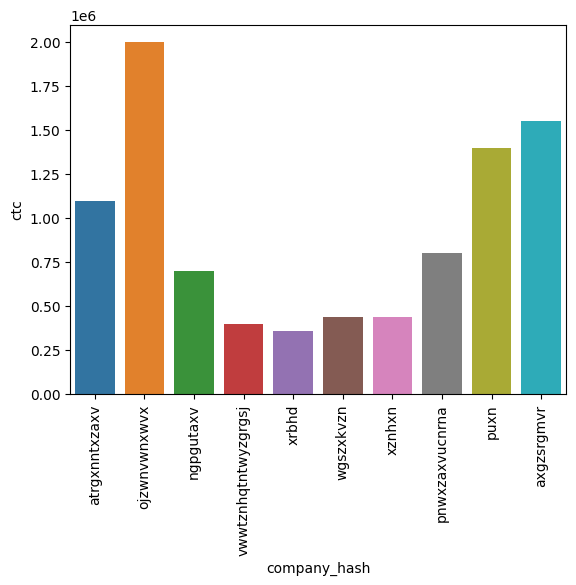

In [ ]:
sns.barplot(data=top10_ctc_companies, x="company_hash", y="ctc")
plt.xticks(rotation=90)

**Top 2 positions in every company (based on their CTC)**

In [ ]:
top_2 = df_merged_company[(df_merged_company['rank']==1) | (df_merged_company['rank']==2)]
top_2

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,average,rank,tier,average_rank
3,vwwtznhqtntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019,400000,Backend Engineer,2019,4,811500,2,tier_1,1.0
4,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,2019,360000,Backend Engineer,2019,4,360000,1,tier_1,1.0
7,pnwxzaxvucnrna,26ec792de0792706df9beb9a8d37f45d732982e7ea21e2...,2013,800000,Other,2020,10,800000,1,tier_1,1.0
9,axgzsrgmvr,be9363f1468f242f655953b2f088922cb6cad80e62c493...,2006,1550000,Engineering Leadership,2019,17,1550000,1,tier_1,1.0
16,zdsrvmoucnrna,d62c27ef153866e66c72544f81fc3186953a51d6682848...,2016,280000,Other,2020,7,280000,1,tier_1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
160245,mrhtonvntaxsxnvr,5feda7334a13c3f92937c0b3c4048aaab617edaf59ee4e...,2013,85000,Backend Engineer,2016,10,85000,1,tier_1,1.0
160249,bvptbjnqxutdvbvkgz,6b163240ed6d31edd56950011b578d1cf255c7515c3f16...,2015,2400000,Backend Engineer,2019,8,2400000,1,tier_1,1.0
160250,wgatergfntwyrru,ee1c076471293e4d5560508b3f7b2cb76e37dea88b74b6...,2019,2200000,Backend Engineer,2020,4,1790000,2,tier_3,1.0
160251,wxowgojntbo,a74c83782bc88928dd12b103c09697fbef87d15bd308d3...,2011,3327000,Backend Engineer,2019,12,2463500,2,tier_3,1.0


**Standardization of data**

In [ ]:
df_head = df.head(50)

In [ ]:
scaler = StandardScaler()
standardized_X = scaler.fit_transform(df_head)

In [ ]:
standardized_X

array([[-1.62476442, -0.4504233 , -0.05343435, -0.10905323,  1.01985534,
         1.13389342,  0.05343435],
       [ 0.10064912, -0.79690277, -0.35029182,  0.5430057 , -0.99680776,
         1.13389342,  0.35029182],
       [-0.54638096,  1.55915759,  0.24342313, -0.39885721, -0.99680776,
        -0.75592895, -0.24342313],
       [ 1.17903259, -0.24253563,  0.83713808, -0.61621019, -0.99680776,
        -0.75592895, -0.83713808],
       [ 1.53849374,  0.58901509,  0.83713808, -0.64519058, -0.99680776,
        -0.75592895, -0.83713808],
       [ 1.25092482, -1.4898617 , -0.05343435, -0.58722979, -0.70871303,
         1.13389342,  0.05343435],
       [ 1.61038597,  1.28197402, -0.05343435, -0.58722979, -0.99680776,
        -0.75592895,  0.05343435],
       [ 0.24443359, -1.21267813, -0.94400677, -0.32640621,  1.01985534,
         1.13389342,  0.94400677],
       [ 0.38821805, -1.28197402,  1.13399556,  0.10829974, -0.99680776,
        -0.75592895, -1.13399556],
       [-1.55287219,  0.7969

**Label encoding**

In [ ]:
cols = ['company_hash', 'email_hash', 'job_position']
df_head[cols] =df_head[cols].apply(LabelEncoder().fit_transform)
df_head.head()

<ipython-input-16-2259374a5298>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_head[cols] =df_head[cols].apply(LabelEncoder().fit_transform)


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience
0,1,18,2016,1100000,8,2020,7
2,25,13,2015,2000000,1,2020,8
3,16,47,2017,700000,1,2019,6
7,40,21,2019,400000,1,2019,4
9,45,33,2019,360000,1,2019,4


In [ ]:
Xfeatures = [['company_hash','job_position','Years_of_Experience']]

**K-means clustering**

In [ ]:
model = KMeans(n_clusters=3)

In [ ]:
pred = model.fit(standardized_X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['Clusters']=pred

In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,Clusters
0,949,65787,2016,1100000,308,2020,7,KMeans(n_clusters=3)
2,15205,43304,2015,2000000,101,2020,8,KMeans(n_clusters=3)
3,11878,143869,2017,700000,101,2019,6,KMeans(n_clusters=3)
7,28601,70228,2019,400000,101,2019,4,KMeans(n_clusters=3)
9,32476,107217,2019,360000,101,2019,4,KMeans(n_clusters=3)


**Elbow method**

In [ ]:
sum_of_sqr_distance = []
k_range = range(1,10)
for k in k_range:
  km_model = KMeans(n_clusters=k)
  km_model.fit(standardized_X)
  sum_of_sqr_distance.append(km_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
sum_of_sqr_distance

[1121938.9999999972,
 995814.9072345605,
 737932.1523649299,
 605654.6084595486,
 521143.26537103846,
 446667.9015829548,
 392808.4098969286,
 331474.79029211955,
 290930.6214841879]

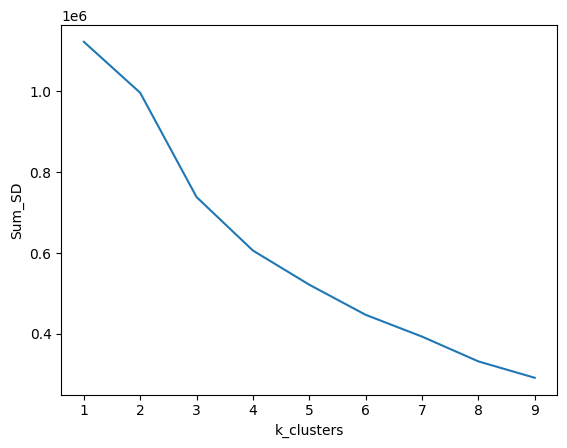

In [ ]:
plt.plot(k_range,sum_of_sqr_distance)
plt.xlabel('k_clusters')
plt.ylabel('Sum_SD')
plt.show()

In [ ]:
df_head

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience
0,0,1,2016,1100000,1,2020,7
2,2,0,2015,2000000,0,2020,8
3,1,4,2017,700000,0,2019,6
7,3,2,2019,400000,0,2019,4
9,4,3,2019,360000,0,2019,4


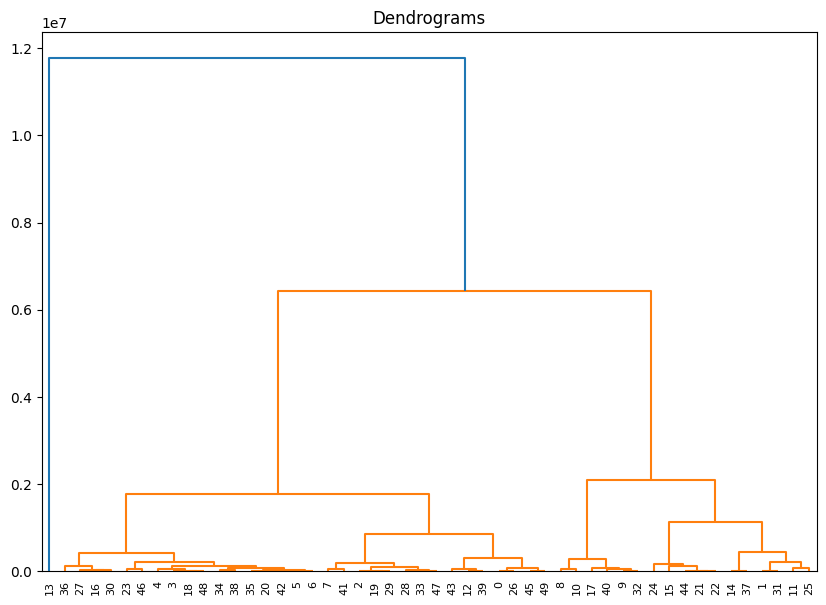

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(df_head, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(df_head)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
X = df_head['company_hash']
Y = df_head['ctc']

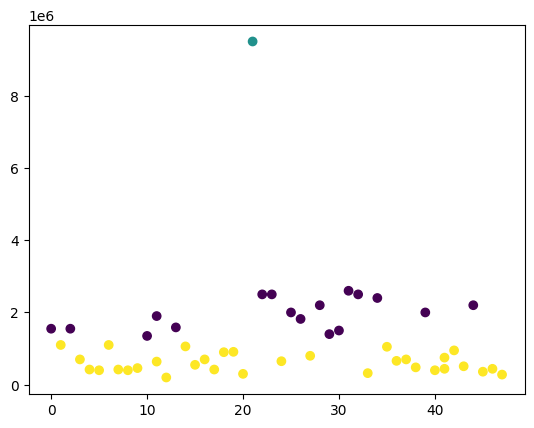

In [ ]:
plt.scatter(X,Y,c=labels)
plt.show()